# Mangrove Distribution Visualization


In [2]:
import gc
import os
import glob
import netCDF4 as nc
import numpy as np
import xarray as xr
import earthpy as et
import rasterio as rio
from rasterio.plot import show
import rioxarray as rxr
from affine import Affine
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from rasterio.merge import merge
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
gc.collect()

mangrove_path = 'CMS_Global_Map_Mangrove_Canopy_1665/data/Mangrove_agb_Haiti.tif'
mangrove_folder = 'CMS_Global_Map_Mangrove_Canopy_1665/data/'
tides_path = 'TPXO/u_s2_tpxo9_atlas_30_v4.nc'

In [4]:
mangrove_canopy = xr.open_rasterio(mangrove_path)
#transform = Affine.from_gdal(*mangrove_canopy.attrs['transform'])
bounds = mangrove_canopy.rio.bounds()

In [5]:
tide_data = (xr.open_dataset(tides_path)).to_dataframe()
print(tide_data)

In [33]:
lon_min = bounds[0]
lon_max = bounds[2]
lat_min = bounds[1]
lat_max = bounds[3]

In [34]:
# Making custom cmap with transparency for visibility
cmap = pl.cm.viridis
my_cmap = cmap(np.arange(cmap.N))

#Setting alpha
my_cmap[:,-1] = np.linspace(0,1,cmap.N)
transp_cmap = ListedColormap(my_cmap)

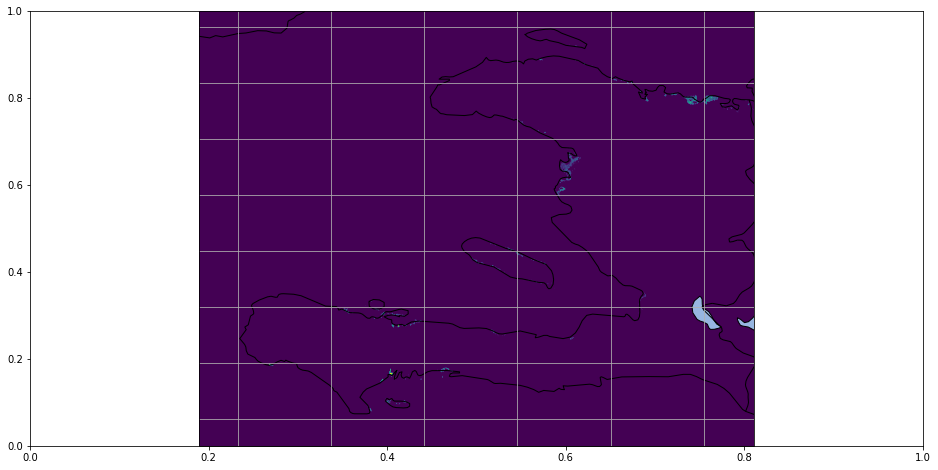

In [35]:
f, ax = plt.subplots(figsize=(16,8))

extent = (lon_min, lon_max, lat_min, lat_max)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.imshow(mangrove_canopy.variable.data[0], origin='upper', cmap='viridis', extent=extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
#ax.gridlines()
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, color='white')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.BORDERS, edgecolor='black')
ax.set_extent(extent)
#mangrove_canopy.plot()
plt.show()
